<h1 style="text-align: center;"><strong>Tareas Cortas - Bloque 3</strong></h1>


<ul>
<li><strong>Curso:</strong> CE5201: Procesamiento y An&aacute;lisis de Im&aacute;genes Digitales</li>
<li><strong>Estudiante:</strong> Luis Felipe Vargas Jimenez</li>
<li><strong>Carnet:</strong> 2020211831<br /><br /></li>

</ul>

<p><strong>Pregunta 2:</strong> Enunciado...</p>

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


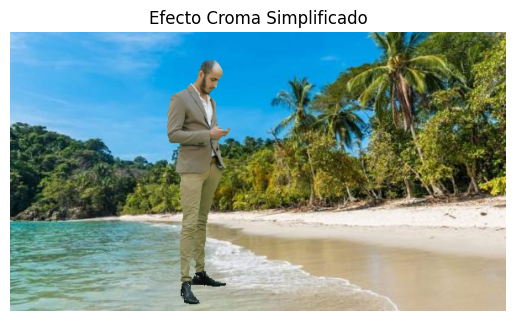

True

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Cargar las imágenes: una con fondo verde y otra que servirá como nuevo fondo
fondo_verde = cv2.imread('fondo_verde.jpg')
nuevo_fondo = cv2.imread('playa.jpg')

# Verificar que las imágenes se hayan cargado correctamente
if fondo_verde is None or nuevo_fondo is None:
    raise ValueError("Error al cargar las imágenes. Verifica las rutas y que los archivos existan.")

# Redimensionar la imagen del nuevo fondo para que coincida con la del fondo verde
nuevo_fondo = cv2.resize(nuevo_fondo, (fondo_verde.shape[1], fondo_verde.shape[0]))

# Convertir la imagen del fondo verde a espacio de color HSV para facilitar la segmentación del color
hsv = cv2.cvtColor(fondo_verde, cv2.COLOR_BGR2HSV)

# Definir el rango de verde en HSV para crear una máscara que detecte el fondo
# Estos valores pueden ajustarse según la tonalidad exacta del verde
verde_bajo = np.array([40, 40, 40])
verde_alto = np.array([80, 255, 255])
mascara_verde = cv2.inRange(hsv, verde_bajo, verde_alto)

# Invertir la máscara para obtener solo las áreas que NO son verdes (el sujeto)
mascara_sujeto = cv2.bitwise_not(mascara_verde)

# Extraer las partes del sujeto y del nuevo fondo usando las máscaras creadas
sujeto = cv2.bitwise_and(fondo_verde, fondo_verde, mask=mascara_sujeto)
fondo = cv2.bitwise_and(nuevo_fondo, nuevo_fondo, mask=mascara_verde)

# Combinar ambas partes: reemplazar el fondo verde con el nuevo fondo
resultado = cv2.add(sujeto, fondo)

# Mostrar el resultado usando matplotlib para compatibilidad con Jupyter Notebook
plt.imshow(cv2.cvtColor(resultado, cv2.COLOR_BGR2RGB))
plt.title('Efecto de Croma')
plt.axis('off')  # Ocultar ejes para una mejor visualización
plt.show()

# Guardar la imagen resultante en el disco
cv2.imwrite('resultado_croma.jpg', resultado)


<p><strong>Pregunta 3:</strong> Enunciado...</p>

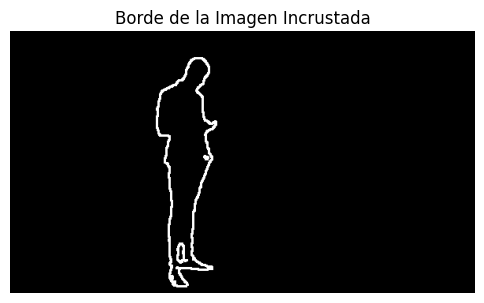

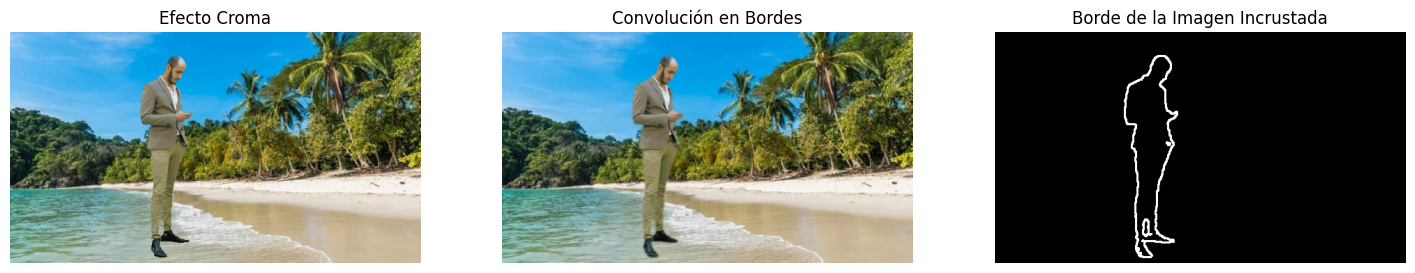

True

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Cargar las imágenes: una con fondo verde y otra que servirá como nuevo fondo
fondo_verde = cv2.imread('fondo_verde.jpg')
playa = cv2.imread('playa.jpg')

# Verificar que las imágenes se hayan cargado correctamente
if fondo_verde is None or playa is None:
    raise ValueError("Error al cargar las imágenes. Verifica las rutas y que los archivos existan.")

# Redimensionar la imagen del nuevo fondo para que coincida con la del fondo verde
playa = cv2.resize(playa, (fondo_verde.shape[1], fondo_verde.shape[0]))

# Convertir la imagen del fondo verde a espacio de color HSV para segmentar el color verde
hsv = cv2.cvtColor(fondo_verde, cv2.COLOR_BGR2HSV)

# Definir el rango de verde en HSV y crear la máscara
verde_bajo = np.array([40, 40, 40])
verde_alto = np.array([80, 255, 255])
mascara_verde = cv2.inRange(hsv, verde_bajo, verde_alto)

# Invertir la máscara para obtener las áreas que no son verdes (el sujeto)
mascara_sujeto = cv2.bitwise_not(mascara_verde)

# Extraer el sujeto y el fondo usando las máscaras
sujeto = cv2.bitwise_and(fondo_verde, fondo_verde, mask=mascara_sujeto)
fondo = cv2.bitwise_and(playa, playa, mask=mascara_verde)

# Combinar ambas partes
resultado_inicial = cv2.add(sujeto, fondo)

# Generar la imagen binaria del borde usando un operador morfológico (para el borde del sujeto)
kernel = np.ones((3, 3), np.uint8)
borde = cv2.Canny(mascara_sujeto, 100, 200)
borde_dilatado = cv2.dilate(borde, kernel, iterations=1)

# Mostrar el borde binario de la imagen incrustada (como en la figura (c) del ejercicio)
plt.figure(figsize=(6, 6))
plt.imshow(borde_dilatado, cmap='gray')
plt.title('Borde de la Imagen Incrustada')
plt.axis('off')
plt.show()

# Aplicar una convolución para suavizar los bordes del sujeto usando una máscara binaria
resultado_final = cv2.inpaint(resultado_inicial, borde_dilatado, 3, cv2.INPAINT_TELEA)

# Mostrar las imágenes: resultado inicial, imagen con convolución en bordes y borde binario
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Imagen con el efecto croma (resultado inicial)
ax[0].imshow(cv2.cvtColor(resultado_inicial, cv2.COLOR_BGR2RGB))
ax[0].set_title('Efecto Croma')
ax[0].axis('off')

# Imagen con la convolución aplicada para atenuar bordes (resultado final)
ax[1].imshow(cv2.cvtColor(resultado_final, cv2.COLOR_BGR2RGB))
ax[1].set_title('Convolución en Bordes')
ax[1].axis('off')

# Imagen del borde de la imagen incrustada
ax[2].imshow(borde_dilatado, cmap='gray')
ax[2].set_title('Borde de la Imagen Incrustada')
ax[2].axis('off')

plt.show()

# Guardar las imágenes generadas
cv2.imwrite('efecto_croma.jpg', resultado_inicial)
cv2.imwrite('convulcion_bordes.jpg', resultado_final)
cv2.imwrite('borde_incrustado.jpg', borde_dilatado)


<p><strong>Pregunta 4:</strong> Enunciado...</p>

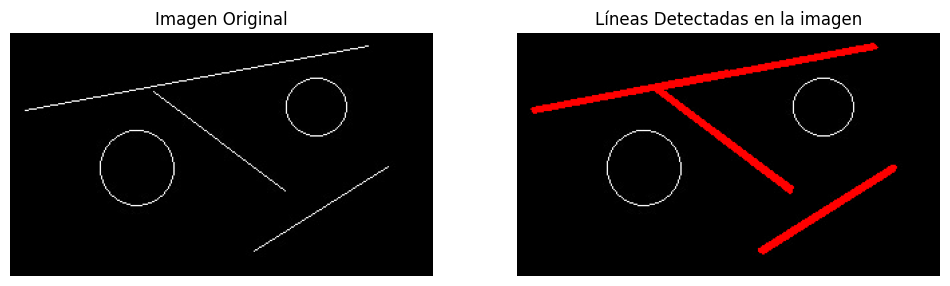

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Cargar la imagen en escala de grises
imagen = cv2.imread('linea2.jpg', cv2.IMREAD_GRAYSCALE)

# Verificar si la imagen se ha cargado correctamente
if imagen is None:
    raise ValueError("Error al cargar la imagen. Verifica la ruta y que el archivo exista.")

# Aplicar detección de bordes con Canny
bordes = cv2.Canny(imagen, 50, 150, apertureSize=3)

# Aplicar la Transformada de Hough Probabilística para detectar líneas
lineas = cv2.HoughLinesP(bordes, 1, np.pi / 180, threshold=50, minLineLength=50, maxLineGap=10)

# Crear una copia de la imagen original para dibujar las líneas detectadas
imagen_lineas = cv2.cvtColor(imagen, cv2.COLOR_GRAY2BGR)

# Dibujar las líneas detectadas en la imagen
if lineas is not None:
    for linea in lineas:
        x1, y1, x2, y2 = linea[0]
        cv2.line(imagen_lineas, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Mostrar la imagen original y la imagen con las líneas detectadas
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(imagen, cmap='gray')
ax[0].set_title('Imagen Original')
ax[0].axis('off')

ax[1].imshow(cv2.cvtColor(imagen_lineas, cv2.COLOR_BGR2RGB))
ax[1].set_title('Líneas Detectadas en la imagen')
ax[1].axis('off')

plt.show()


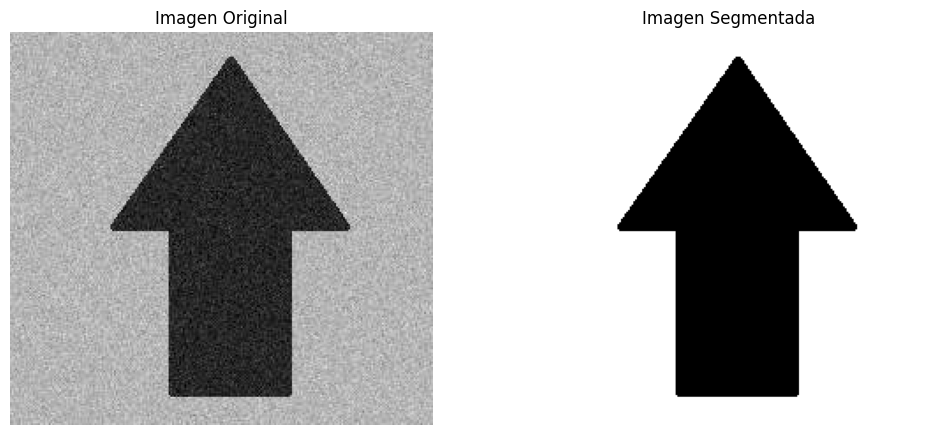

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def umbral_global_optimo(imagen):
    """
    Implementa el método iterativo del umbral global óptimo para segmentar la imagen.

    :param imagen: Imagen en escala de grises a segmentar.
    :return: Imagen binaria segmentada.
    """
    # Inicializar el umbral con la media de los valores de intensidad de la imagen
    umbral_actual = np.mean(imagen)
    diferencia = float('inf')  # Inicializar con una diferencia infinita para asegurar la entrada al bucle

    # Iterar hasta que la diferencia entre umbrales sea suficientemente pequeña
    while diferencia > 0.5:
        # Dividir la imagen en dos regiones según el umbral actual
        fondo = imagen[imagen <= umbral_actual]
        objeto = imagen[imagen > umbral_actual]
        
        # Calcular las medias de las dos regiones
        media_fondo = np.mean(fondo) if len(fondo) > 0 else 0
        media_objeto = np.mean(objeto) if len(objeto) > 0 else 0
        
        # Calcular el nuevo umbral como la media de las medias
        umbral_nuevo = (media_fondo + media_objeto) / 2
        
        # Calcular la diferencia entre el umbral nuevo y el umbral actual
        diferencia = abs(umbral_nuevo - umbral_actual)
        umbral_actual = umbral_nuevo

    # Generar la imagen segmentada aplicando el umbral final calculado
    imagen_segmentada = (imagen > umbral_actual).astype(np.uint8) * 255
    return imagen_segmentada

# Cargar la imagen en escala de grises
imagen = cv2.imread('imagen5.jpg', cv2.IMREAD_GRAYSCALE)

# Verificar si la imagen se ha cargado correctamente
if imagen is None:
    raise ValueError("Error al cargar la imagen. Verifica la ruta y que el archivo exista.")

# Aplicar el método iterativo del umbral global óptimo
imagen_segmentada = umbral_global_optimo(imagen)

# Mostrar la imagen original y la imagen segmentada
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(imagen, cmap='gray')
ax[0].set_title('Imagen Original')
ax[0].axis('off')

ax[1].imshow(imagen_segmentada, cmap='gray')
ax[1].set_title('Imagen Segmentada')
ax[1].axis('off')

plt.show()


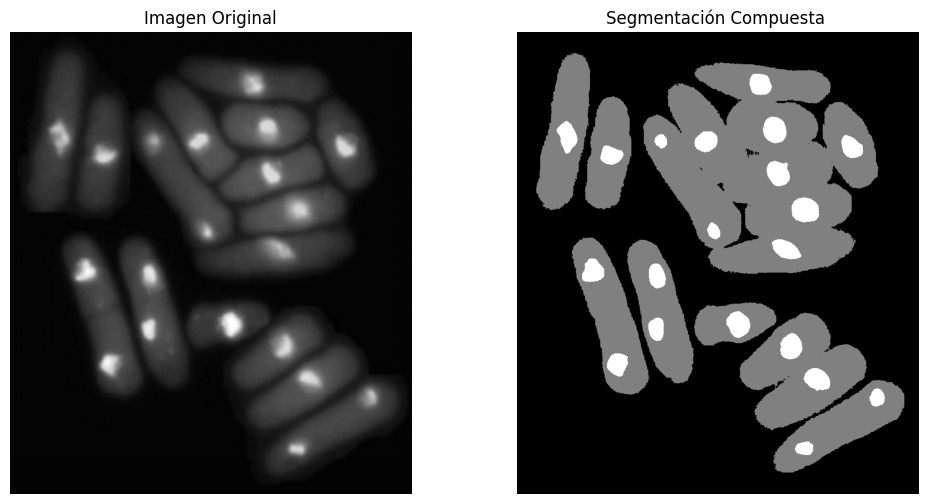

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Cargar la imagen en escala de grises
imagen = cv2.imread('imagen3.jpg', cv2.IMREAD_GRAYSCALE)

# Verificar si la imagen se ha cargado correctamente
if imagen is None:
    raise ValueError("Error al cargar la imagen. Verifica la ruta y que el archivo exista.")

# Dimensiones de la imagen
m, n = imagen.shape

# Calcular el histograma normalizado
histograma, _ = np.histogram(imagen, bins=256, range=(0, 256))
histograma = histograma / (m * n)  # Normalizar el histograma

# Suma acumulativa y suma acumulativa ponderada
p = np.cumsum(histograma)
mv = np.cumsum(np.arange(256) * histograma)
mg = mv[-1]

# Calcular la varianza entre clases para cada posible umbral
varianzas = (mg * p - mv) ** 2 / (p * (1 - p) + 1e-10)  # Evitar división por cero
T1 = np.argmax(varianzas)  # Umbral de Otsu para regiones brillantes

# Calcular la varianza entre clases para dos umbrales (T1 y T2)
sr = np.zeros((256, 256))
for k1 in range(256):
    for k2 in range(k1 + 1, 256):
        p1, p2, p3 = np.sum(histograma[:k1 + 1]), np.sum(histograma[k1 + 1:k2 + 1]), np.sum(histograma[k2 + 1:])
        m1 = np.sum(np.arange(k1 + 1) * histograma[:k1 + 1]) / p1 if p1 > 0 else 0
        m2 = np.sum(np.arange(k1 + 1, k2 + 1) * histograma[k1 + 1:k2 + 1]) / p2 if p2 > 0 else 0
        m3 = np.sum(np.arange(k2 + 1, 256) * histograma[k2 + 1:]) / p3 if p3 > 0 else 0
        sr[k1, k2] = p1 * (m1 - mg) ** 2 + p2 * (m2 - mg) ** 2 + p3 * (m3 - mg) ** 2

# Obtener los umbrales T1 y T2 para la segmentación compuesta
idx = np.unravel_index(np.argmax(sr), sr.shape)
T1, T2 = idx

# Crear la segmentación compuesta
segmentacion_compuesta = np.zeros_like(imagen, dtype=np.uint8)
segmentacion_compuesta[imagen > T2] = 255  # Región de núcleos en blanco
segmentacion_compuesta[(imagen > T1) & (imagen <= T2)] = 128  # Células en gris

# Mostrar las imágenes
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Imagen original
ax[0].imshow(imagen, cmap='gray')
ax[0].set_title('Imagen Original')
ax[0].axis('off')

# Imagen segmentada con umbral compuesto
ax[1].imshow(segmentacion_compuesta, cmap='gray')
ax[1].set_title(f'Segmentación Compuesta ')
ax[1].axis('off')

plt.show()


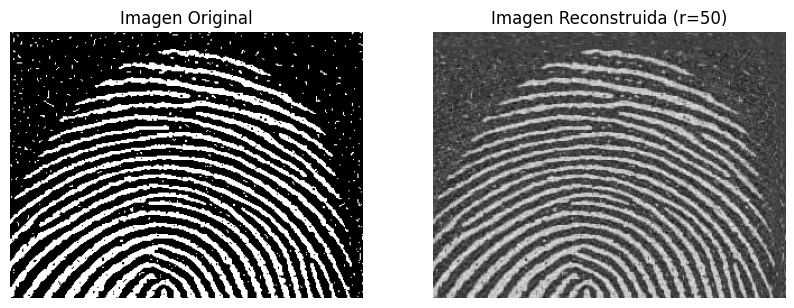

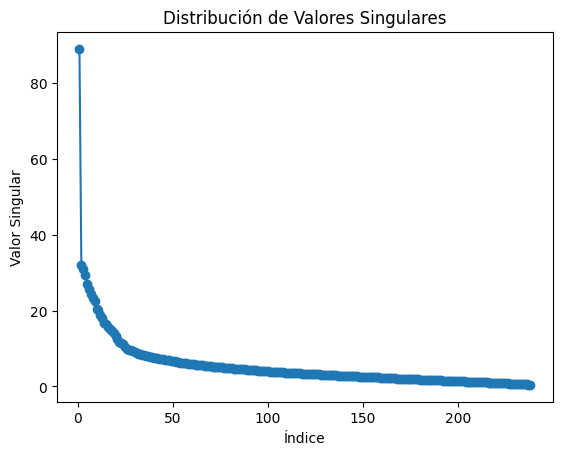

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def rango_reducido(A, r):
    """
    Reconstruye la matriz A utilizando solo los primeros r valores singulares.
    
    :param A: Matriz original.
    :param r: Número de valores singulares a utilizar.
    :return: Aproximación de la matriz A usando rango reducido.
    """
    U, S, VT = np.linalg.svd(A, full_matrices=False)
    Ur = U[:, :r]
    Sr = np.diag(S[:r])
    VTr = VT[:r, :]
    A_reducida = np.dot(Ur, np.dot(Sr, VTr))
    return A_reducida, S

# Cargar la imagen en escala de grises y convertir a valores de punto flotante
A = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE).astype(np.float32) / 255.0

# Mostrar la imagen original
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(A, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# Definir un valor fijo de r para reconstrucción
r = 50  # Puedes cambiar el valor de r para obtener diferentes niveles de compresión

# Realizar la descomposición SVD y reconstrucción con rango reducido
Ar, valores_singulares = rango_reducido(A, r)

# Mostrar la imagen reconstruida
plt.subplot(1, 2, 2)
plt.imshow(Ar, cmap='gray')
plt.title(f'Imagen Reconstruida (r={r})')
plt.axis('off')
plt.show()

# Guardar matrices reducidas y original en archivos de texto
np.savetxt('imagen_original.txt', A)
np.savetxt('imagen_reducida.txt', Ar)

# Mostrar valores singulares en un gráfico para observar su distribución
plt.figure()
plt.plot(range(1, len(valores_singulares) + 1), valores_singulares, marker='o')
plt.title('Distribución de Valores Singulares')
plt.xlabel('Índice')
plt.ylabel('Valor Singular')
plt.show()


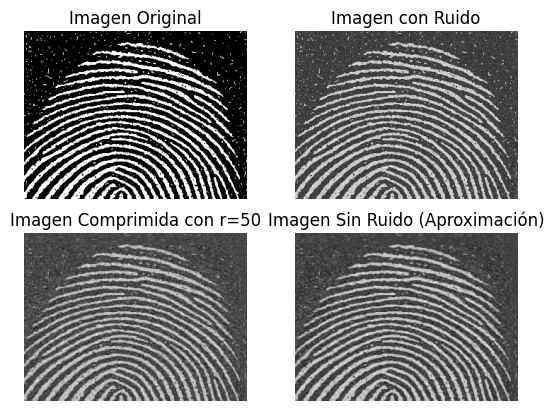

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def rango_reducido(A, r):
    """
    Reconstruye la matriz A utilizando solo los primeros r valores singulares.
    
    :param A: Matriz original.
    :param r: Número de valores singulares a utilizar.
    :return: Aproximación de la matriz A usando rango reducido.
    """
    U, S, VT = np.linalg.svd(A, full_matrices=False)
    Ur = U[:, :r]
    Sr = np.diag(S[:r])
    VTr = VT[:r, :]
    A_reducida = np.dot(Ur, np.dot(Sr, VTr))
    return A_reducida

# Cargar la imagen en escala de grises
imagen = cv2.imread('imagen2.jpg', cv2.IMREAD_GRAYSCALE)

# Dimensiones de la imagen y generación de ruido
m, n = imagen.shape
sigma = 0.1
ruido = sigma * np.random.randn(m, n)
imagen_ruidosa = (imagen / 255.0) + ruido  # Normalizar y añadir ruido

# Mostrar la imagen original y la imagen con ruido
plt.subplot(2, 2, 1)
plt.imshow(imagen / 255.0, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(imagen_ruidosa, cmap='gray')
plt.title('Imagen con Ruido')
plt.axis('off')

# Definir un valor fijo de r para reconstrucción
r = 50  # Puedes ajustar este valor manualmente para diferentes niveles de compresión

# Reconstrucción de la imagen usando el rango reducido
imagen_reducida = rango_reducido(imagen_ruidosa, r)

# Mostrar la imagen reconstruida y comprimida
plt.subplot(2, 2, 3)
plt.imshow(imagen_reducida, cmap='gray')
plt.title(f'Imagen Comprimida con r={r}')
plt.axis('off')

# Comparar la imagen comprimida con la original
imagen_sin_ruido = rango_reducido(imagen / 255.0, r)
plt.subplot(2, 2, 4)
plt.imshow(imagen_sin_ruido, cmap='gray')
plt.title('Imagen Sin Ruido (Aproximación)')
plt.axis('off')

plt.show()
